<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-12-04 16:16:23.245066: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 16:16:23.245090: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 16:16:23.245116: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 16:16:23.252745: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

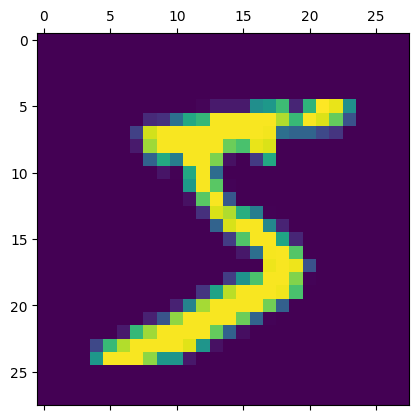

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

2023-12-04 16:16:25.892355: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-04 16:16:25.898175: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-04 16:16:25.898346: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/5


2023-12-04 16:16:28.428134: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb255fd49d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-04 16:16:28.428182: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-12-04 16:16:28.443670: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-04 16:16:28.473950: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-12-04 16:16:28.537797: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9230
Epoch 2/5
  60/1875 [..............................] - ETA: 3s - loss: 0.1423 - accuracy: 0.9589

2023-12-04 16:16:31.797872: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18816000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.1230 - accuracy: 0.9639
Epoch 3/5
  87/1875 [>.............................] - ETA: 3s - loss: 0.0808 - accuracy: 0.9734

2023-12-04 16:16:35.757047: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18816000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0835 - accuracy: 0.9754
Epoch 4/5
  78/1875 [>.............................] - ETA: 3s - loss: 0.0658 - accuracy: 0.9820

2023-12-04 16:16:39.491985: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18816000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0651 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9837


In [12]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [13]:
model.get_weights()

[array([[ 0.06355837, -0.04139247, -0.05075819, ...,  0.05190077,
         -0.04564583, -0.05140493],
        [-0.02296875,  0.00529007, -0.07728516, ...,  0.06771198,
          0.06747535, -0.00112118],
        [ 0.04574595, -0.07510927, -0.02374806, ...,  0.03598411,
         -0.05649457, -0.00730689],
        ...,
        [-0.02856754,  0.0386078 , -0.0407429 , ..., -0.07057025,
          0.01903058, -0.00743234],
        [ 0.05089916, -0.04058272,  0.05905016, ..., -0.05128837,
         -0.05237857,  0.06793855],
        [-0.01518179,  0.06033537, -0.03420489, ..., -0.01136021,
          0.01047795, -0.00328256]], dtype=float32),
 array([ 3.62192956e-03,  6.15029484e-02,  6.30636141e-02, -4.77613434e-02,
        -2.90885679e-02,  1.11085139e-01,  4.85656820e-02,  1.14956737e-01,
        -1.84738375e-02,  3.10598034e-02,  4.00088243e-02, -5.77763543e-02,
        -6.30034804e-02, -1.99128743e-02,  2.53590439e-02,  7.60392547e-02,
        -2.26717573e-02, -1.09560369e-02,  9.63326097e